In [37]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [38]:
train = pd.read_csv('../input/Train.csv')
test = pd.read_csv('../input/Test.csv')

In [39]:
train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005,0.318835
std,0.997338,1.021776,1.011768,1.017189,0.978654,110.741562
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880,-71.897040
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527,-0.610665
75%,0.682118,0.645442,0.639130,0.646290,0.650089,71.226603
max,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


In [40]:
test.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-0.021804,-0.012806,-0.010988,-0.034864,0.031016,2.988897
std,0.979163,1.021580,1.041857,1.034507,0.937469,114.139329
min,-2.564288,-2.992849,-2.767818,-3.041550,-2.493446,-320.048473
25%,-0.784581,-0.640843,-0.780267,-0.730596,-0.589199,-65.763521
50%,-0.004759,-0.077186,-0.109300,-0.040752,0.047327,0.699553
75%,0.681777,0.738286,0.754063,0.656363,0.586405,83.257690
max,3.244870,2.591723,2.909357,2.662180,2.870382,335.497450


In [41]:
train.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

In [42]:
test.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

### So we got cleaned data

All are contineous

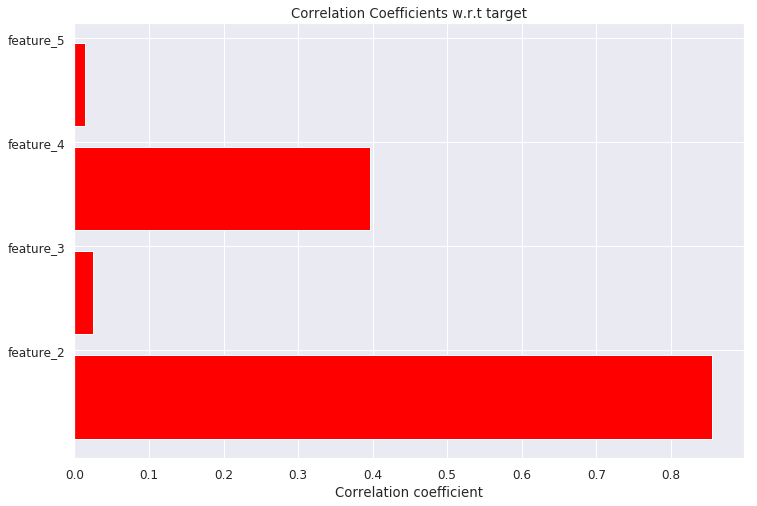

In [43]:
#plotting correlations
num_feat=train.columns[train.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train[col].values, train.target.values)[0,1])

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,8))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t target");

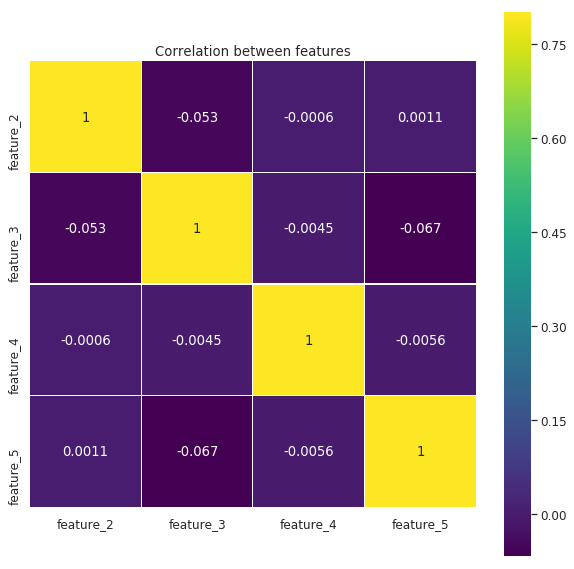

In [44]:
#Heatmap
corrMatrix=train[num_feat].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

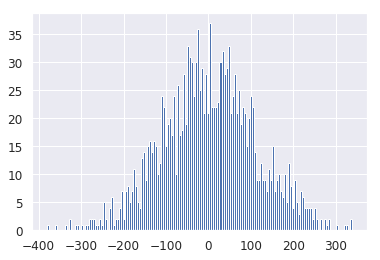

In [45]:
plt.hist((train.target),bins=152)
plt.show()

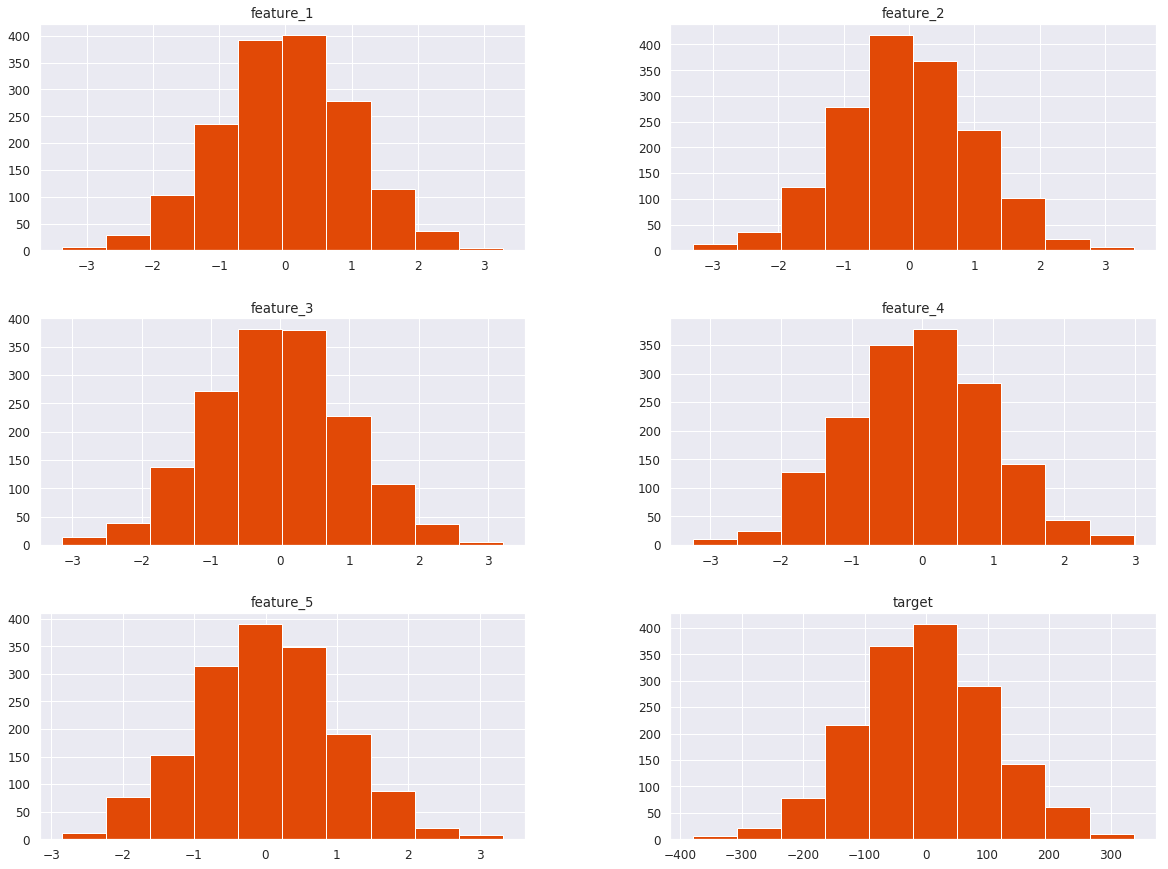

In [46]:
# Let's see how the numeric data is distributed.

train.hist(bins=10, figsize=(20,15), color='#E14906')
plt.show()

# Linear Regression 

By merging train.csv and test.csv data and then splitting in 80:20 ratio

then creating model

and calculating score

In [47]:
combined = train.append(test)
combined.reset_index(inplace=True)


In [48]:
combined.describe()

,index,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,679.500000,-0.001069,-0.024644,-0.037765,-0.040899,0.015808,0.852848
std,480.675332,0.993540,1.021498,1.017681,1.020420,0.970356,111.405622
min,0.000000,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,249.750000,-0.689607,-0.683679,-0.730135,-0.716403,-0.612389,-70.173508
50%,599.500000,-0.000780,-0.047127,-0.049629,-0.033136,-0.004115,-0.466188
75%,1099.250000,0.682118,0.661455,0.647560,0.648268,0.635205,73.638671
max,1599.000000,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


In [49]:
y = combined['target']
x = combined.drop('target', axis=1)

In [50]:
y.describe()

count    2000.000000
mean        0.852848
std       111.405622
min      -379.829794
25%       -70.173508
50%        -0.466188
75%        73.638671
max       337.643014
Name: target, dtype: float64

In [51]:
x.describe()

,index,feature_1,feature_2,feature_3,feature_4,feature_5
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,679.500000,-0.001069,-0.024644,-0.037765,-0.040899,0.015808
std,480.675332,0.993540,1.021498,1.017681,1.020420,0.970356
min,0.000000,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707
25%,249.750000,-0.689607,-0.683679,-0.730135,-0.716403,-0.612389
50%,599.500000,-0.000780,-0.047127,-0.049629,-0.033136,-0.004115
75%,1099.250000,0.682118,0.661455,0.647560,0.648268,0.635205
max,1599.000000,3.287205,3.438895,3.216176,2.985410,3.321770


### Splitting into 80:20

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y ,test_size=0.2)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 6)
(400, 6)
(1600,)
(400,)


In [54]:
# Implimenting Linear Regression from inbuilt function of sklearn
from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=True)
model = reg.fit(X_train,y_train)
predict = model.predict(X_test)

In [74]:
#Predicting Score
from sklearn.metrics import r2_score
print(r2_score(y_test,predict))

0.9652683982412767


In [73]:
print("Training Score %.4f"%reg.score(X_train,y_train))
print("Testing Score %.4f"%reg.score(X_test,y_test))

Training Score 0.9671
Testing Score 0.9653


# Cross Validation

In [75]:
from sklearn.model_selection import cross_val_score

In [77]:
scores=cross_val_score(reg,X_train,y_train,cv=10,scoring='r2')

In [79]:
print(scores)

[0.9742942  0.9690659  0.96528537 0.97470028 0.9549502  0.97095972
 0.96522781 0.95813844 0.96009921 0.96945765]


In [82]:
print(scores.mean())

0.9662178757288962


In [83]:
print(scores.std())

0.006401534297996244


### Calculating loss


In [90]:
scores=cross_val_score(reg,X_train,y_train,cv=10,scoring='neg_mean_squared_error')

In [91]:
print(scores)

[-350.69193093 -364.41648534 -454.75151141 -339.1719146  -537.54033008
 -408.73147461 -404.28760396 -407.55332667 -464.67421468 -380.12198977]


In [92]:
#Average loss
print(scores.mean())

-411.19407820544376


In [86]:
print(scores.std())

57.26175771935867


## Linear Regression fit

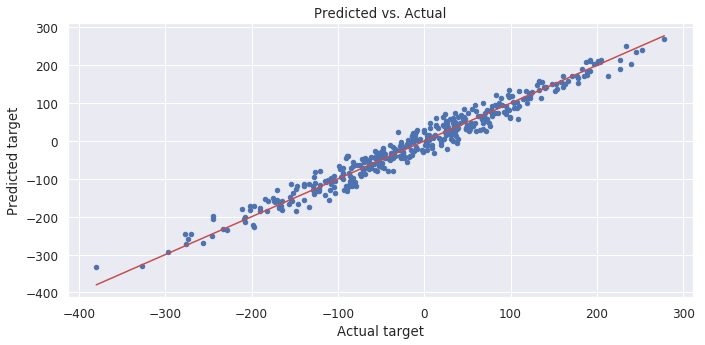

In [66]:
y_pred = reg.predict(X_test)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual target')
plt.ylabel('Predicted target')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'r')
plt.tight_layout()

### Predicted Values

In [69]:
y_pred.shape

(400,)

In [71]:
print("predicted values for 400 test data are", y_pred)

predicted values for 400 test data are [ 2.68552785e+02  9.45836446e+01  5.86871511e+01  4.76337354e+01
 -2.70691582e+02  9.20312800e+01  6.56367175e+01 -6.70386066e+01
  7.20393873e+01 -4.71882254e+01  1.13772616e+02 -1.05961668e+02
 -5.87422314e+01  1.26520287e+02  4.66802155e+01 -1.17279890e+02
 -3.55121809e+00 -2.61270314e+01 -4.83740239e+01  8.03006385e+01
 -3.58760910e+01  3.03495095e+01 -3.87767459e+01 -3.28092065e+01
  8.68540114e+00 -2.36219167e+02 -3.13249786e+01 -1.13216958e+02
  3.96832799e+01 -4.02290193e+01 -1.80653637e+02 -8.70352640e+01
  9.50859648e+01  3.98694188e+01  2.23196185e+01  1.15097928e+02
 -1.12294254e+01 -2.13901415e+02  2.02754750e+01  2.07702100e+02
 -2.77552538e+01 -1.30301541e+02  9.12832269e+01 -1.93027949e+01
 -7.81842920e+01  6.45077402e+00  1.72129857e+02 -8.80952865e+01
 -7.30861637e+01 -2.83531873e-01 -7.10613676e+01  1.35788277e+01
  7.42549105e+01  1.25986571e+01 -1.34156524e+01 -4.29461128e+01
 -1.04619817e+02 -7.55890478e-01 -8.34267217e+01 -6